In [26]:
# 내장 붓꽃 데이터셋
from sklearn.datasets import load_iris
# 의사결정트리 모델
from sklearn.tree import DecisionTreeClassifier
# 데이터셋 분리 함수
from sklearn.model_selection import train_test_split
import pandas as pd

In [27]:
data = pd.read_csv('/content/train.csv')

data.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [29]:
df_x_data = data.drop(['Y_Class'],axis=1)
df_x_data = df_x_data.drop(['PRODUCT_ID'],axis=1)
df_x_data = df_x_data.drop(['TIMESTAMP'],axis=1)
df_x_data = pd.get_dummies(df_x_data)
df_x_data = df_x_data.drop(['Y_Quality'],axis=1)
df_x_data = df_x_data.fillna(0)


df_y_data = data['Y_Class']

In [30]:
df_x_data

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_2875,LINE_T010305,LINE_T010306,LINE_T050304,LINE_T050307,LINE_T100304,LINE_T100306,PRODUCT_CODE_A_31,PRODUCT_CODE_O_31,PRODUCT_CODE_T_31
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,False,False,True,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,False,True,False,False,True,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,False,False,True,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,False,True,False,False,True,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,0.0,45.0,10.0,0.0,50.0,10.0,52.0,2.0,...,0.0,False,False,False,False,False,True,False,False,True
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,False,False,True,False,False
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,False,False,True,False,False
596,40.0,94.0,0.0,45.0,11.0,0.0,45.0,10.0,31.0,2.0,...,0.0,False,False,False,False,True,False,False,True,False


In [31]:
df_y_data

0      1
1      2
2      1
3      2
4      1
      ..
593    1
594    0
595    0
596    1
597    1
Name: Y_Class, Length: 598, dtype: int64

In [32]:
# 데이터셋의 20%를 테스트 데이터로 사용
X_train, X_test, y_train, y_test = train_test_split(
    df_x_data,
    df_y_data,
    test_size=0.2,
    random_state=11,
    stratify=df_y_data
)


In [33]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, criterion= 'entropy', max_depth= 3, min_samples_leaf= 4, min_samples_split= 2)
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       random_state=11)

In [34]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2])

In [35]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.6667


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [37]:
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개
scores = cross_val_score(dt_clf , df_x_data , df_y_data ,scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.6167 0.675  0.3917 0.6555 0.437 ]
평균 검증 정확도: 0.5552


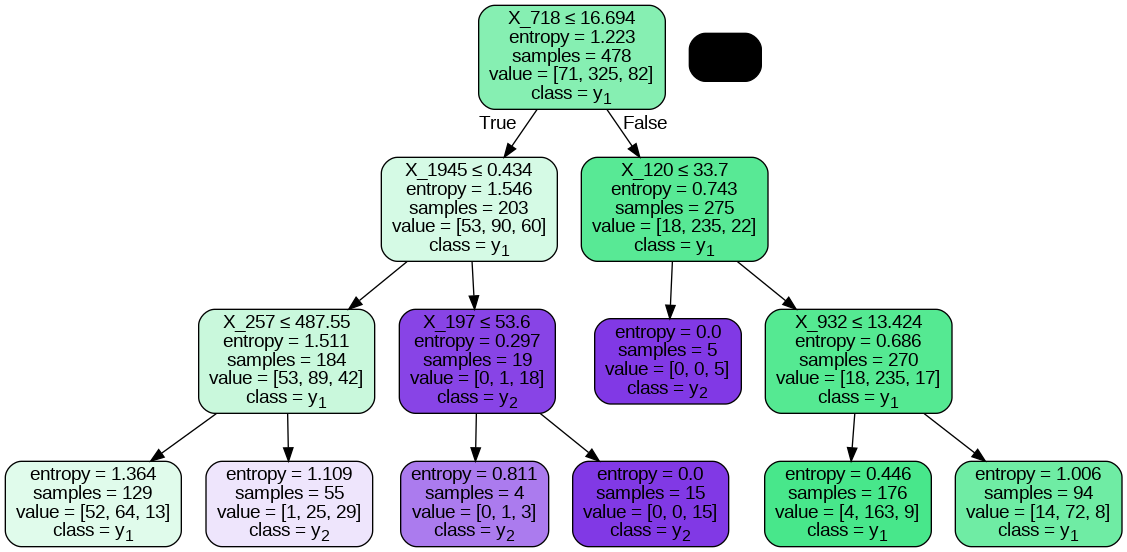

In [38]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = export_graphviz(dt_clf, out_file=None,
                           feature_names=df_x_data.columns,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
from sklearn.model_selection import GridSearchCV



# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 수행
best_dt_clf = grid_search.best_estimator_
y_pred = best_dt_clf.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test set accuracy:  0.6666666666666666


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=5)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))

훈련세트 정확도: 0.889
테스트세트 정확도: 0.720


In [39]:
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개
scores = cross_val_score(rand_clf , df_x_data , df_y_data ,scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.5667 0.6583 0.6667 0.6807 0.6555]
평균 검증 정확도: 0.6456


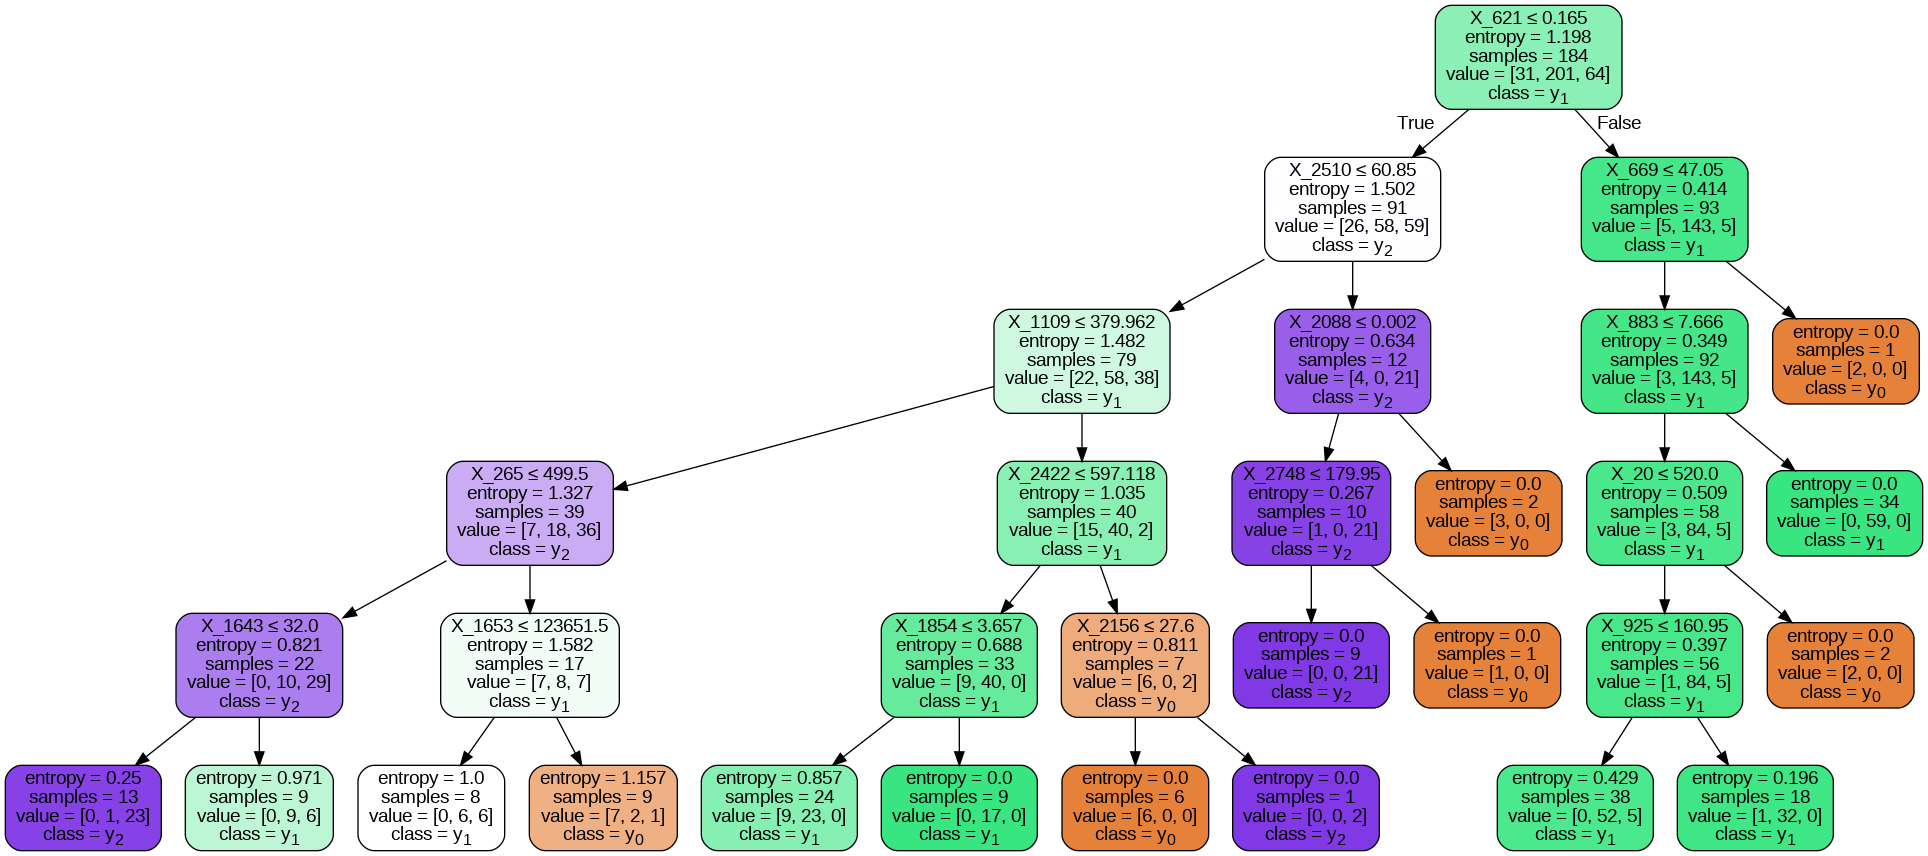

In [16]:
estimator = rand_clf.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=df_x_data.columns,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

Image(graph.pipe(format='png'))

In [ ]:
# 랜덤 포레스트 모델 정의
rf_clf = RandomForestClassifier(random_state=11)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측 수행
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [17]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

clf = SVC()
# C is error penalty. if C is bigger then more strictly but margin will be narrow...
clf.fit(X_train,y_train)


SVC()

In [18]:
y_pred = clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(clf.score(X_test, y_test)))

훈련세트 정확도: 0.713
테스트세트 정확도: 0.707


In [40]:
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개
scores = cross_val_score(clf , df_x_data , df_y_data ,scoring='accuracy',cv=5)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.675  0.7083 0.7    0.6891 0.6471]
평균 검증 정확도: 0.6839


In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'eta': 0.3,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 11,
    'num_class': 3  # 클래스 수
}

num_round = 100  # 부스팅 라운드 수
evals = [(dtrain, 'train'), (dtest, 'eval')]

model = xgb.train(params, dtrain, num_round, evals, early_stopping_rounds=10)


y_pred = model.predict(dtest)



accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-mlogloss:0.81466	eval-mlogloss:0.93010
[1]	train-mlogloss:0.63473	eval-mlogloss:0.83888
[2]	train-mlogloss:0.51250	eval-mlogloss:0.79394
[3]	train-mlogloss:0.41904	eval-mlogloss:0.76643
[4]	train-mlogloss:0.34869	eval-mlogloss:0.74554
[5]	train-mlogloss:0.29598	eval-mlogloss:0.74145
[6]	train-mlogloss:0.25173	eval-mlogloss:0.73839
[7]	train-mlogloss:0.21149	eval-mlogloss:0.73663
[8]	train-mlogloss:0.17937	eval-mlogloss:0.74590
[9]	train-mlogloss:0.15449	eval-mlogloss:0.75421
[10]	train-mlogloss:0.13468	eval-mlogloss:0.77948
[11]	train-mlogloss:0.11654	eval-mlogloss:0.79542
[12]	train-mlogloss:0.10410	eval-mlogloss:0.79802
[13]	train-mlogloss:0.09183	eval-mlogloss:0.81084
[14]	train-mlogloss:0.08193	eval-mlogloss:0.81775
[15]	train-mlogloss:0.07393	eval-mlogloss:0.84259
[16]	train-mlogloss:0.06624	eval-mlogloss:0.85983
Accuracy: 0.72
Confusion Matrix:
[[ 1  8  0]
 [ 1 45  3]
 [ 0  9  8]]
Classification Report:
              precision    recall  f1-score   support

           0